In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from os.path import isfile
from pyspark.mllib.fpm import FPGrowth
from datetime import datetime
from functools import reduce
import matplotlib.dates as mdates
import random

In [2]:
# RDD Format for Hourly Data
# Column Data-> 0: id || 
#               1: webcam_id ||
#               2: month ||
#               3: date ||
#               4: hour ||
#               5: webcam_lat ||
#               6: webcam_long ||
#               7: AQ_site_id ||
#               8: AQ_monitor_id ||
#               9: AQ_lat ||
#               10: AQ_long||
#               11: PM_value

In [3]:
# RDD Format for Daily Data
# Column Data-> 0: id || 
#               1: webcam_id ||
#               2: month ||
#               3: date ||
#               4: hour ||
#               5: webcam_lat ||
#               6: webcam_long ||
#               7: AQ_site_id ||
#               8: AQ_monitor_id ||
#               9: AQ_lat ||
#               10: AQ_long||
#               11: PM_value

In [4]:
path_to_hourly_data = '/Users/emanuelcortes/Documents/Senior_Year/Winter_Quarter_2018/CS325B/air_quality_project/AMOS_AQ_hourly.csv'
path_to_daily_data = '/Users/emanuelcortes/Documents/Senior_Year/Winter_Quarter_2018/CS325B/air_quality_project/AMOS_AQ_daily.csv'
lines_of_hourly_data = sc.textFile(path_to_hourly_data)
#lines_of_daily_data = sc.textFile(path_to_daily_data)

In [5]:
def get_rid_of_first_line(lines_of_data):
    get_rid_of_first_line = lambda line: line != '"","webcam_id","month","date","image_name","webcam_lat","webcam_long","AQ_site_id","AQ_monitor_id","AQ_lat","AQ_long","PM_value"'
    lines_of_data = lines_of_data.filter(get_rid_of_first_line)
    return lines_of_data

In [6]:
def create_filtered_webcamId_AND_year_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration(lines_of_hourly_data):
    lines_of_hourly_data = get_rid_of_first_line(lines_of_hourly_data)

    
    
    create_webcamId_AND_date_AND_hour_TO_pm = lambda line:((line.strip().split(',')[1], line.strip().split(',')[3], line.strip().split(',')[4]), float(line.strip().split(',')[11].replace('"', '')))
    webcamId_AND_date_AND_hour_TO_pm = lines_of_hourly_data.map(create_webcamId_AND_date_AND_hour_TO_pm)
    #filter_by_webcamId = lambda entry: entry[0][0] in ['1066', '701', '13607', '4232', '6629', '23', '1057', '3419', '204', '16969', '530', '13452']
    filter_by_webcamId = lambda entry: entry[0][0] in ['20265', '13342', '20258', '18879', '17603', '21587', '21673', '1066', '2045', '93', '5207', '6629', '1333', '30', '204', '22014']
    webcamId_AND_date_AND_hour_TO_avgPM_filtered_by_webcamId = webcamId_AND_date_AND_hour_TO_pm.filter(filter_by_webcamId).groupByKey().mapValues(list).map(lambda entry: (entry[0], np.average(entry[1])))
    webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id = webcamId_AND_date_AND_hour_TO_avgPM_filtered_by_webcamId.map(lambda entry: ((entry[0][0], re.match('(\d\d\d\d).*',entry[0][1]).group(1)), entry[1])).groupByKey().mapValues(list)
    
    a = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entry[0], [("0-9", sum(list(map(lambda x: x > 0.0 and x <= 9.0, entry[1]))))]))
    b = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entry[0], [("10-19", sum(list(map(lambda x: x > 10.0 and x <= 19.0, entry[1]))))]))
    c = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entlry[0], [("20-29", sum(list(map(lambda x: x > 20.0 and x <= 29.0, entry[1]))))]))
    d = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entry[0], [("30-39", sum(list(map(lambda x: x > 30.0 and x <= 39.0, entry[1]))))]))
    e = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entry[0], [("40-49", sum(list(map(lambda x: x > 40.0 and x <= 49.0, entry[1]))))]))
    f = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entry[0], [("50-59", sum(list(map(lambda x: x > 50.0 and x <= 59.0, entry[1]))))]))
    g = webcamId_AND_year_TO_LIST_OF_avgPM_filtered_by_webcam_Id.map(lambda entry: (entry[0], [("60-69", sum(list(map(lambda x: x > 60.0 and x <= 69.0, entry[1]))))]))
    webcamId_AND_year_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration = a.union(b).union(c).union(d).union(e).union(f).union(g).reduceByKey(lambda x,y : x+y)
    year_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration = webcamId_AND_year_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration.map(lambda entry: (entry[0][1], (entry[0][0], entry[1]))).groupByKey().mapValues(list)
    return year_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration.collect()

In [7]:
def create_filtered_webcamId_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration(lines_of_hourly_data):
    return None

In [8]:
res = create_filtered_webcamId_AND_year_TO_LIST_OF_COUNTS_OF_rangesForPMconcentration(lines_of_hourly_data)

In [9]:
res_a = dict((x, y) for x, y in res)

In [10]:
sorted(res_a.keys())

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

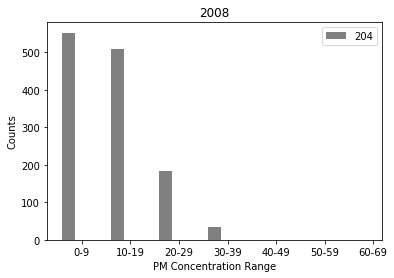

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2008']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2008')
ax.legend(list_of_rects, list_of_labels)

plt.show()

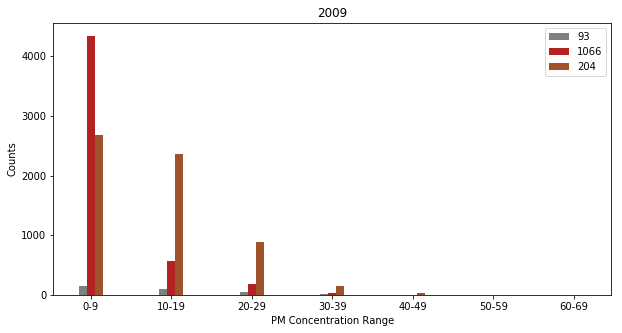

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10      # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2009']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+(width))
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2009')
ax.legend(list_of_rects, list_of_labels)

plt.show()

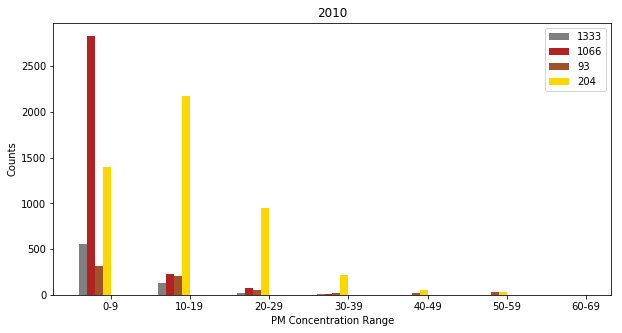

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10     # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2010']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+(width+0.25))
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2010')
ax.legend(list_of_rects, list_of_labels)

plt.show()

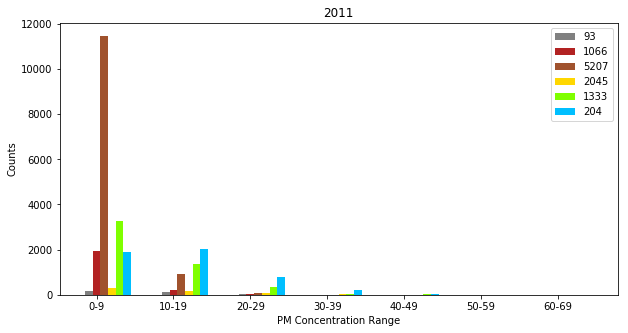

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2011']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2011')
ax.legend(list_of_rects, list_of_labels)

plt.show()

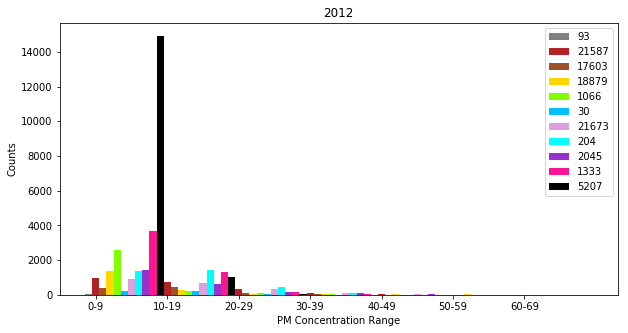

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2012']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2012')
ax.legend(list_of_rects, list_of_labels)

plt.show()

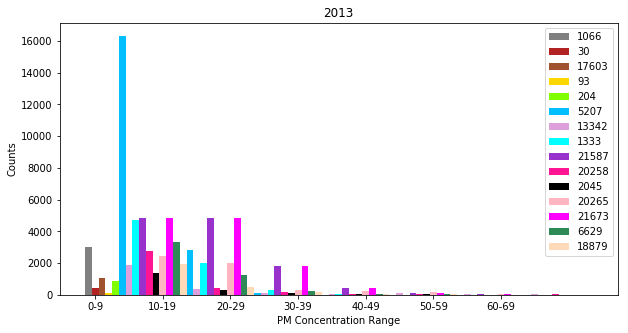

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2013']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2013')
ax.legend(list_of_rects, list_of_labels)

plt.show()

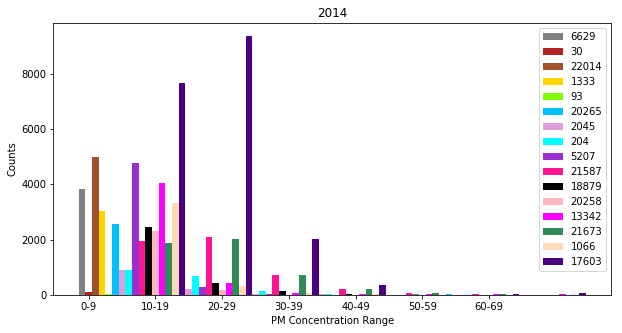

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2014']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2014')
ax.legend(list_of_rects, list_of_labels)

plt.show()

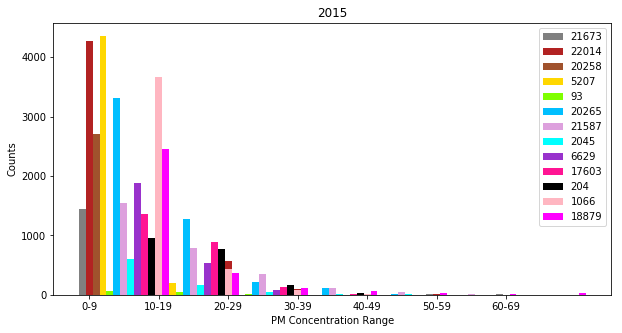

In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2015']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2015')
ax.legend(list_of_rects, list_of_labels)

plt.show()

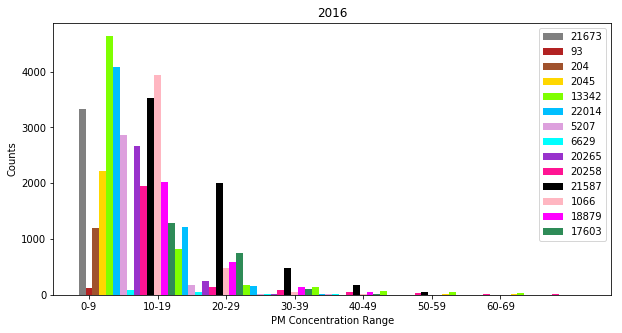

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2016']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2016')
ax.legend(list_of_rects, list_of_labels)

plt.show()

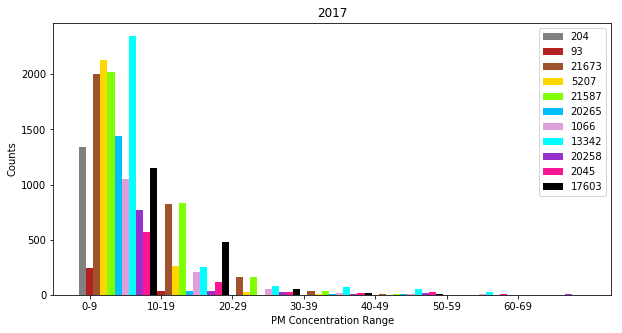

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111)

colors_for_plot = ['gray', 'firebrick', 'sienna', 'gold', 'chartreuse', 'deepskyblue', 'plum', 'cyan', 'darkorchid', 'deeppink', 'black', 'lightpink', 'magenta', 'seagreen', 'peachpuff', 'indigo']

list_of_rects = []
list_of_labels, list_of_list_of_counts_by_range_with_x_labels = map(list, zip(*res_a['2017']))
for index, list_of_counts_by_range_with_x_labels in enumerate(list_of_list_of_counts_by_range_with_x_labels):
    x_labels, list_of_counts_by_range = map(list, zip(*list_of_counts_by_range_with_x_labels))
    rects = ax.bar(ind+(width * index),  list_of_counts_by_range, width, color=colors_for_plot[index])
    list_of_rects.append(rects[0])

ax.set_ylabel('Counts')
ax.set_xlabel('PM Concentration Range')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'))
ax.set_title('2017')
ax.legend(list_of_rects, list_of_labels)

plt.show()